In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})
from multicompartment import MultiCompartmentHodgkinHuxley
import numpy as np
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
# exercise 3
# fig 6.17 
m = MultiCompartmentHodgkinHuxley(N=201, Ie=[2e-6], mu_inj=[0], L=3e-2)
m.solve(t=0.2, dt=0.00005)

delta x 0.0222388059701
delta t 0.00165
velocity is 13.4780642243


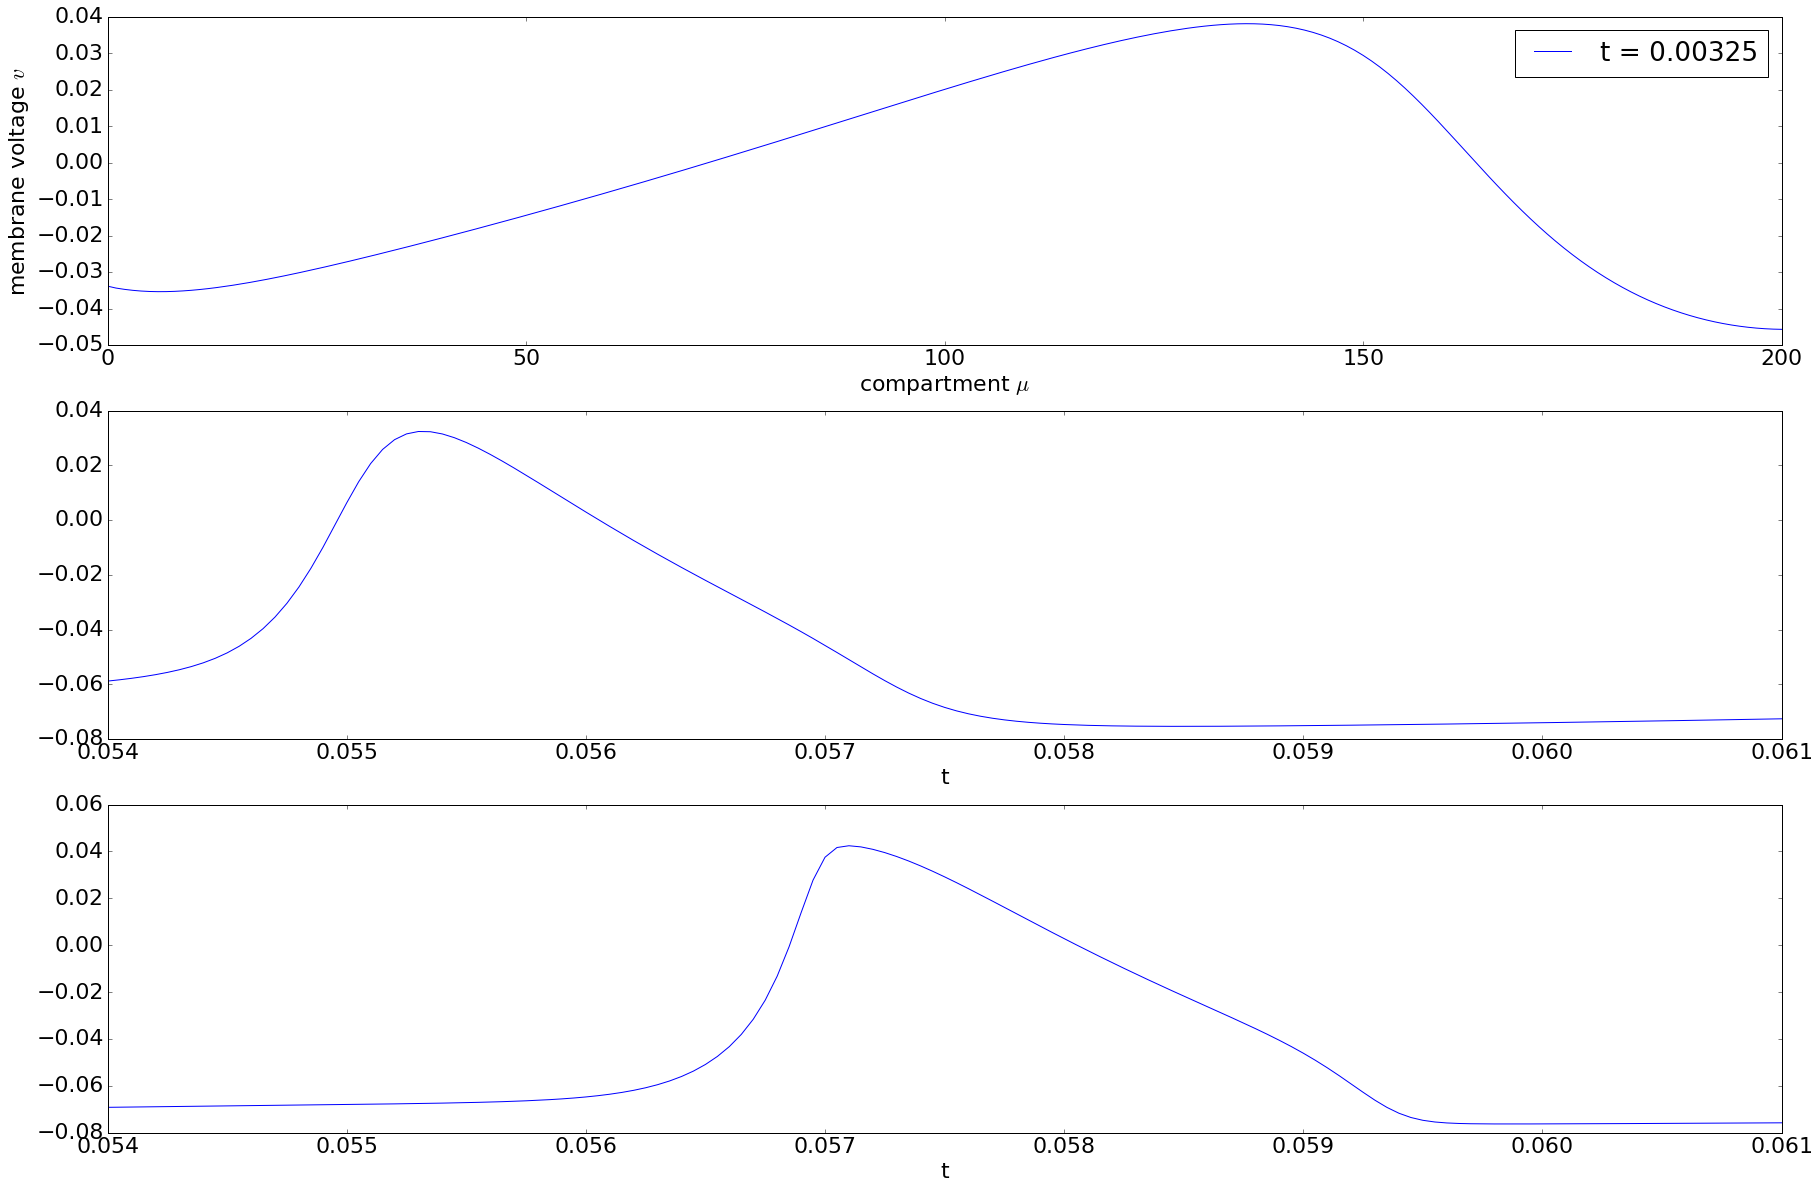

In [6]:
fig,ax = plt.subplots(3,1,figsize=(30,20))
for i,ti in enumerate([65]):#[0, 1, 50, 100, 300, 500, 800, 999]):
    ax[0].plot(range(m.N), m.v[:,ti], label='t = {}'.format(m.dt*ti))
ax[0].legend()
ax[0].set_xlabel('compartment $\mu$')
ax[0].set_ylabel('membrane voltage $v$')
mu=[50,199]
ax[1].plot(m.t, m.v[mu[0],:], label='$\mu$ = {}'.format(mu[0]))
ax[2].plot(m.t, m.v[mu[1],:], label='$\mu$ = {}'.format(mu[1]))
ax[1].set_xlim(0.054,0.061)
ax[2].set_xlim(0.054,0.061)
ax[1].set_xlabel('t')
ax[2].set_xlabel('t')
#4
m.calculate_propagation_velocity(50,199)
print 'velocity is', m.prop_velocity

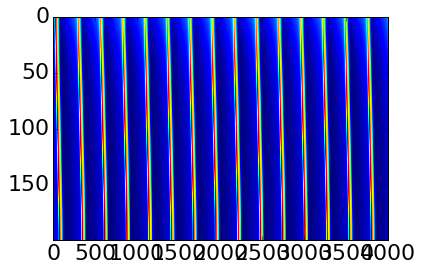

In [11]:
plt.imshow(m.v[1:,:], aspect='auto')

In [60]:
m = MultiCompartmentHodgkinHuxley(N=201, Ie=[7e-8], mu_inj=[0], L=3e-2)
m.solve(t=0.1, dt=0.0001, a_array=np.arange(11,40,2))

peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)
peaks1 (0,)
peaks2 (0,)


In [73]:
def fun(a):
    print 'calculating a =', a
    m = MultiCompartmentHodgkinHuxley(N=201, Ie=[7e-8], mu_inj=[0], L=3e-2, a=a)
    m.solve(t=0.1, dt=0.0001)
    m.calculate_propagation_velocity(50,150,test=1)
    return m.prop_velocity
A = np.arange(11,100,5)*1e-6
vel = np.zeros(A.size)
anal_vel = np.zeros(A.size)
for i,a in enumerate(A):
    print 'calculating a =', a
    m = MultiCompartmentHodgkinHuxley(N=201, Ie=[(7+i)*1e-8], mu_inj=[0], L=3e-2, a=a)
    m.solve(t=0.1, dt=0.0001)
    m.calculate_propagation_velocity(50,150,test=1)
    vel[i] = m.prop_velocity
    anal_vel[i] = m.anal_vel

calculating a = 1.1e-05
peaks1 (2,)
peaks2 (2,)
delta x 0.0149253731343
delta t 0.0072
calculating a = 1.6e-05
peaks1 (9,)
peaks2 (9,)
delta x 0.0149253731343
delta t 0.0065
calculating a = 2.1e-05
peaks1 (9,)
peaks2 (9,)
delta x 0.0149253731343
delta t 0.0055
calculating a = 2.6e-05
peaks1 (9,)
peaks2 (8,)
delta x 0.0149253731343
delta t 0.0048
calculating a = 3.1e-05
peaks1 (8,)
peaks2 (8,)
delta x 0.0149253731343
delta t 0.0044
calculating a = 3.6e-05
peaks1 (8,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.004
calculating a = 4.1e-05
peaks1 (7,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.0037
calculating a = 4.6e-05
peaks1 (7,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.0034
calculating a = 5.1e-05
peaks1 (7,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.0032
calculating a = 5.6e-05
peaks1 (7,)
peaks2 (6,)
delta x 0.0149253731343
delta t 0.0031
calculating a = 6.1e-05
peaks1 (6,)
peaks2 (6,)
delta x 0.0149253731343
delta t 0.0029
calculating a = 6.6e-05
peaks1 (6,)
peaks2 (

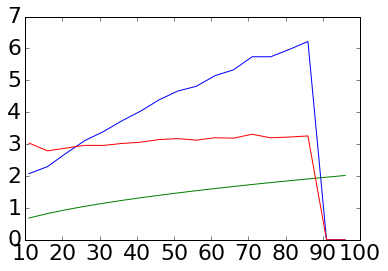

In [74]:
plt.plot(A*1e6, vel)
plt.plot(A*1e6, anal_vel)
plt.plot(A*1e6, vel/anal_vel)

In [26]:
def fun(a):
    print 'calculating a =', a
    m = MultiCompartmentHodgkinHuxley(N=201, Ie=[2e-6], mu_inj=[0], L=3e-2, a=a)
    m.solve(t=00.1, dt=0.00001)
    m.calculate_propagation_velocity(100,200)
    return m.prop_velocity
fun_v = np.vectorize(fun)
a_array = np.arange(300,500,50)*1e-6
vel = fun_v(a_array)

calculating a = 0.0003
peaks1 (7,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.00079
calculating a = 0.0003
peaks1 (7,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.00079
calculating a = 0.00035


KeyboardInterrupt: 

[ 18.89287739  21.32196162  23.69106847  26.18486515] [ 0.0003   0.00035  0.0004   0.00045]


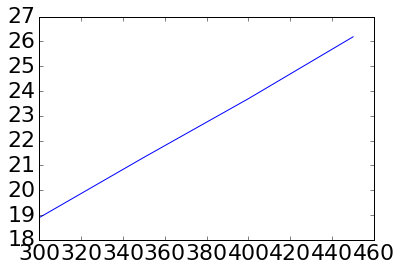

In [245]:
plt.plot(a_array*1e6, vel)
print vel, a_array

In [254]:
#5
m = MultiCompartmentHodgkinHuxley(N=201, Ie=[2e-6,2e-6], mu_inj=[0,200], L=3e-2)
m.solve(t=2, dt=0.0001)

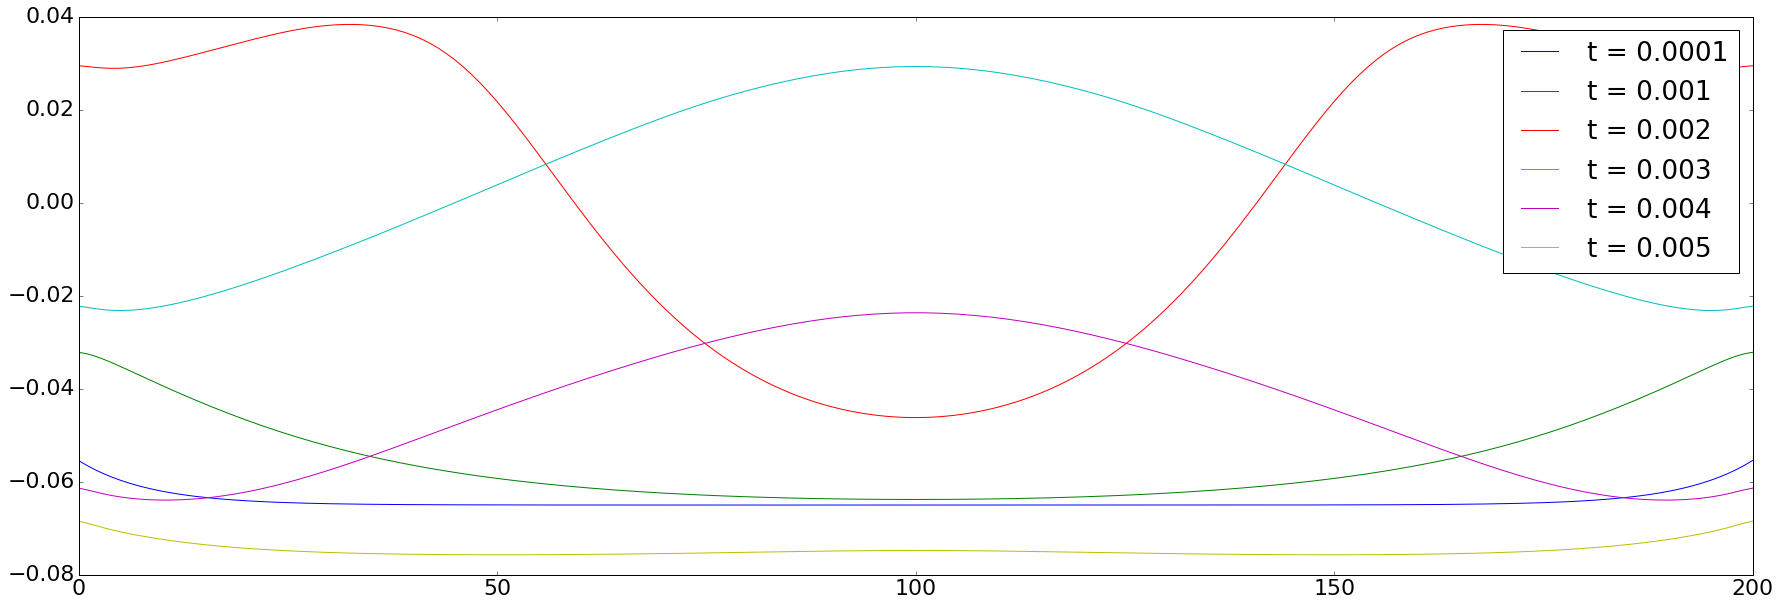

In [269]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
num = m.t/m.dt
mid = num/2
for i,ti in enumerate([1,10,20,30,40,50]):
    ax.plot(range(m.N), m.v[:,ti], label='t = {}'.format(m.t[ti]))
plt.legend()

In [45]:
m = MultiCompartmentHodgkinHuxley(N=201, Ie=[2e-8], mu_inj=[0], L=3e-2, a=10e-6)
m.solve(t=0.1, dt=0.00005)
m.calculate_propagation_velocity(100,200)


peaks1 (8,)
peaks2 (7,)
delta x 0.0149253731343
delta t 0.0063


AttributeError: 'numpy.ndarray' object has no attribute 't'

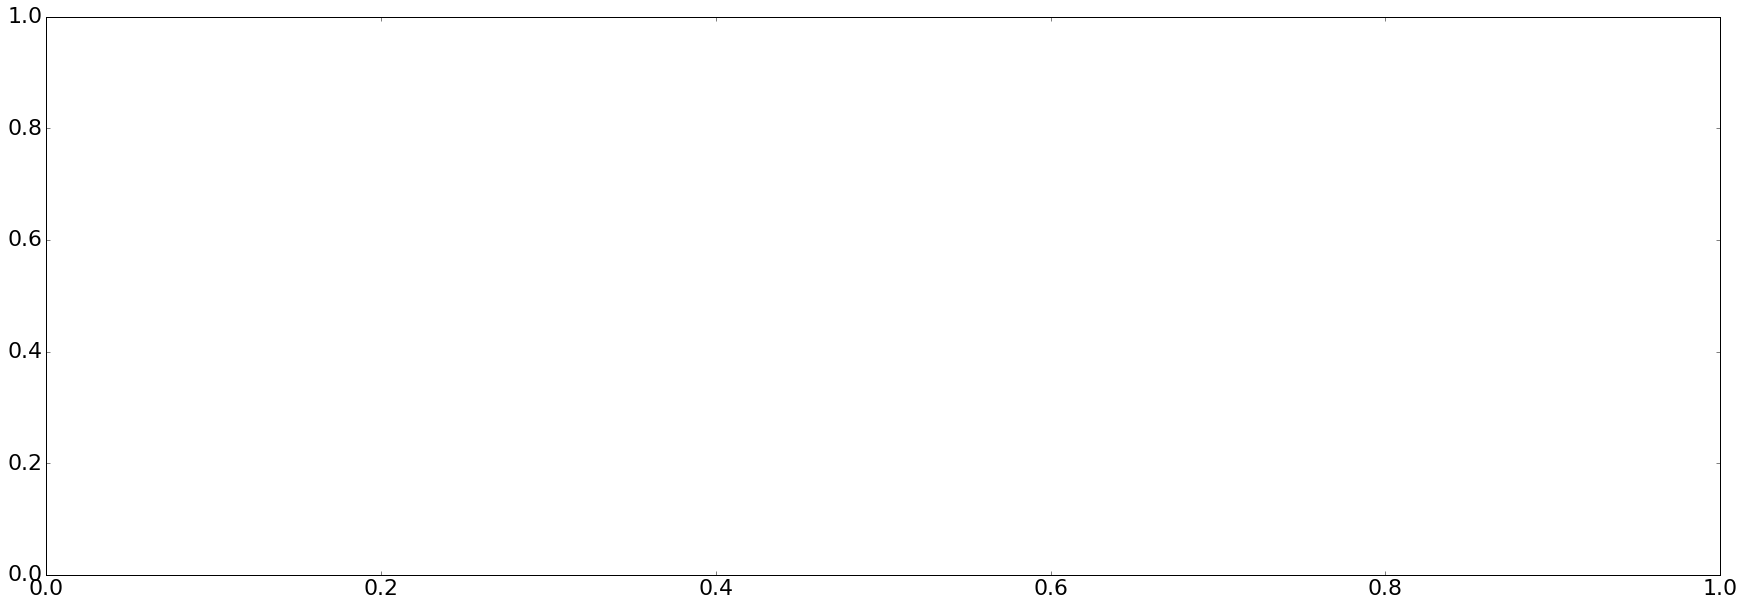

In [53]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,mu in enumerate([0,50,150]):
    ax.plot(m.t, m.v[mu,:], label='$\mu$ = {}'.format(mu))
plt.legend()

In [338]:
N=23452
L=1e-2
l_myelin = 1e-3
l_ranvier = 2e-6
num_per_ranvier = np.ceil((l_ranvier/(L/N)))
num_per_myelin = np.ceil(l_myelin/(L/N))
num_blocks = np.floor((N - np.floor(0.5*num_per_myelin)) / (num_per_myelin + num_per_ranvier))
array = [False]* int(0.5*num_per_myelin)
array += num_blocks * ([True]*num_per_ranvier + [False]*num_per_myelin)
array += (N-len(array)) * [False]

print '# ranvier', num_per_ranvier
print '# myelin', num_per_myelin
print '# blocks', num_blocks
print 'size array', len(array)
# print 'array', array
assert N==len(array)
np.where(np.array(array))


# ranvier 5.0
# myelin 2346.0
# blocks 9.0
size array 23452
(5000,)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [118]:
#6
m = MultiCompartmentHodgkinHuxley(N=5000, Ie=[1e-9], mu_inj=[500], L=5e-3, myelinated=True)
m.solve(t=0.01, dt=0.00001)

# ranvier 2.0
# myelin 1001.0
# blocks 4.0
size array 5000


(array([ 500,  501, 1503, 1504, 2506, 2507, 3509, 3510]),)


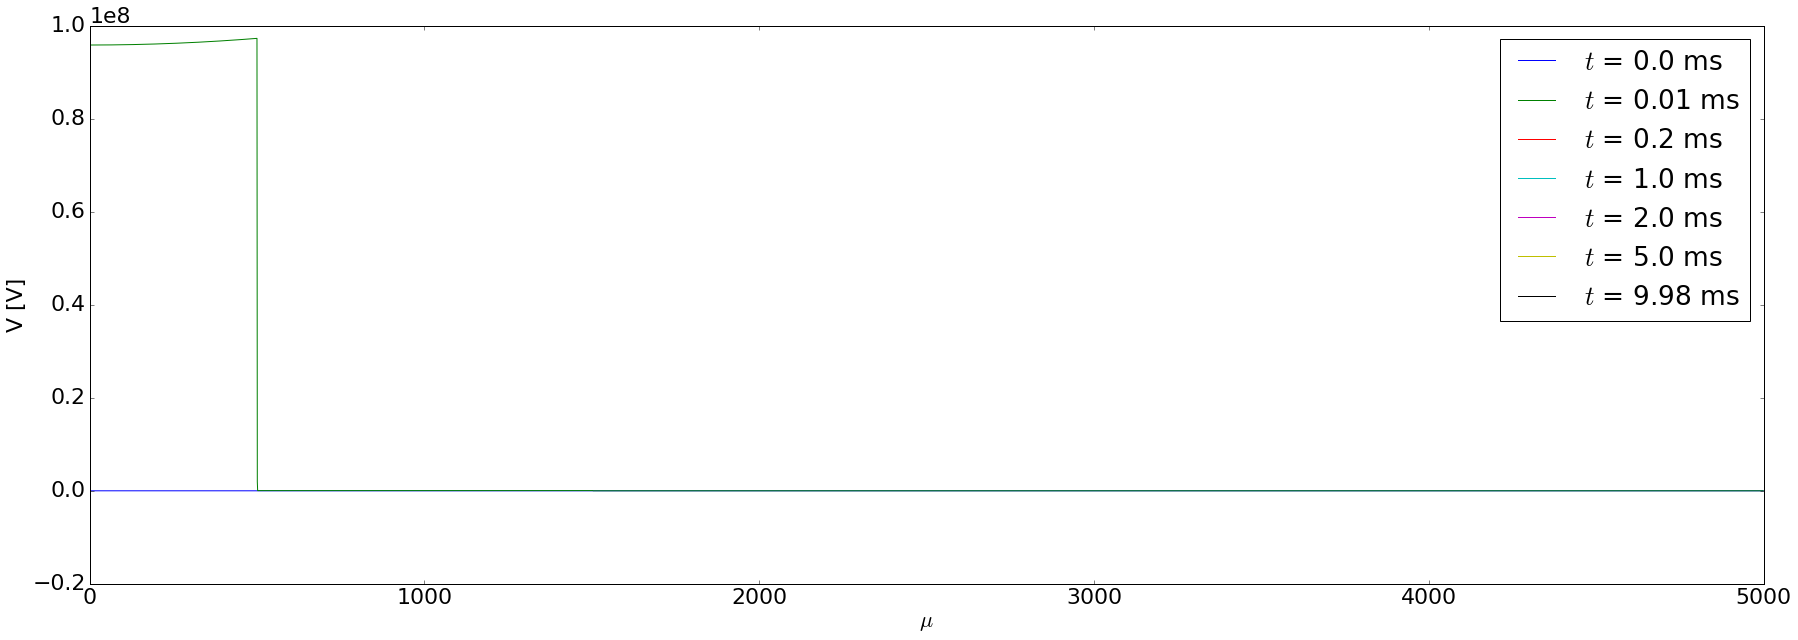

In [119]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,ti in enumerate([0,1,20,100,200,500,998]):
    ax.plot(range(m.N), m.v[:,ti], label='$t$ = {} ms'.format(m.t[ti]*1e3))
plt.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('V [V]')
col = np.where(m.myelin_pos!=True)
# ax.vlines(col,-0.07,0.07, colors='r', alpha=0.5)
print col
# ax.set_xlim(300,1800)


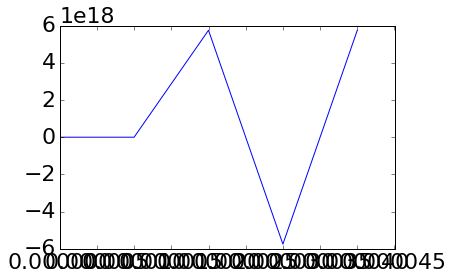

In [124]:
plt.plot(m.t, m.v[501,:])

In [309]:
m = MultiCompartmentHodgkinHuxley(N=10000, Ie=[2e-6], mu_inj=[0], L=1e-2, myelinated=True)
m.solve(t=0.01, dt=0.00001)

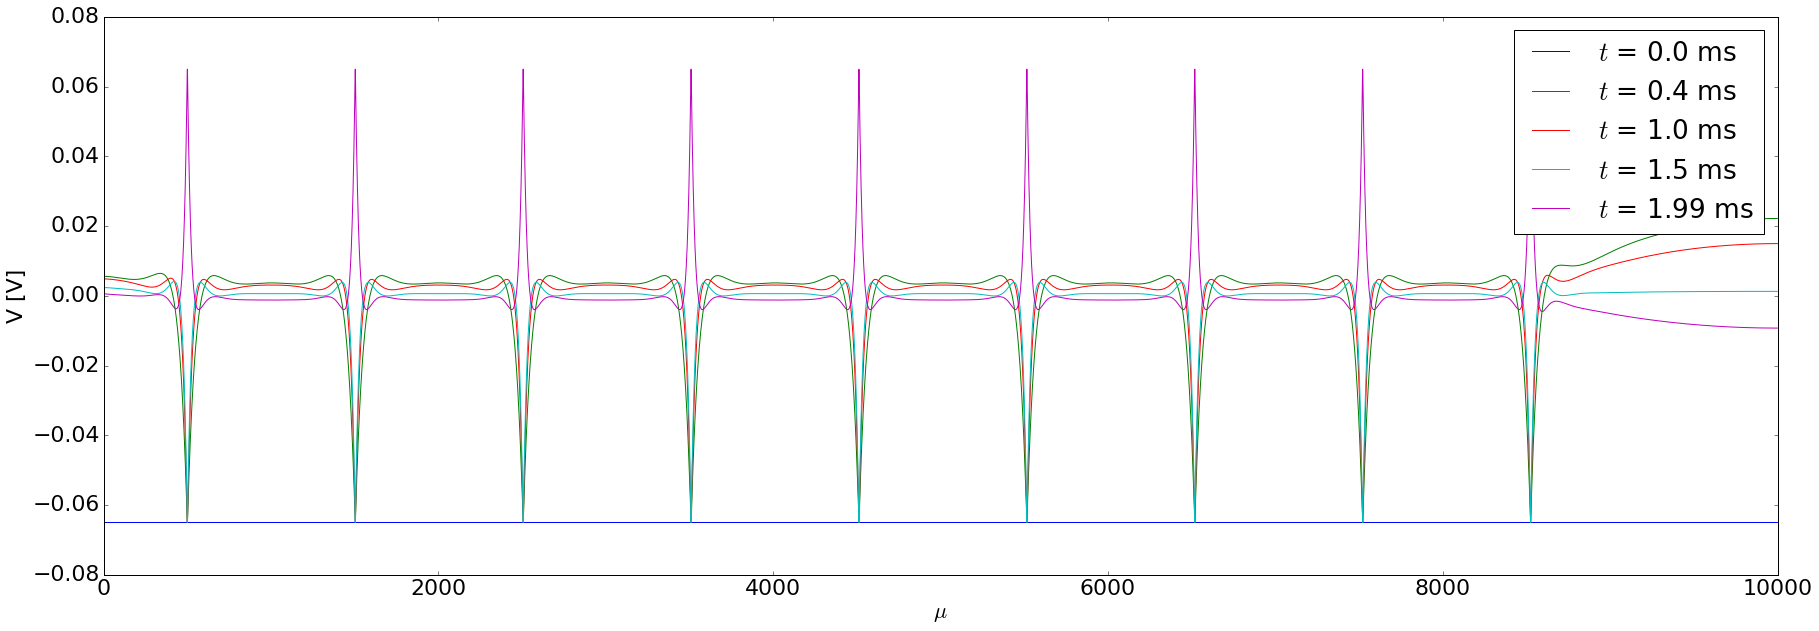

In [310]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,ti in enumerate([0,40,100,150,199]):
    ax.plot(range(m.N), m.v[:,ti], label='$t$ = {} ms'.format(m.t[ti]*1e3))
plt.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('V [V]')

## above this shit works

In [163]:
m = MultiCompartmentHodgkinHuxley(N=201, Ie=[2e-6], mu_inj=[0], L=3e-2, a=60e-6)
m.solve(t=0.2, dt=0.0001)
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,mu in enumerate([0,150,200]):
    ax.plot(m.t, m.v[mu,:], label='$\mu$ = {}'.format(mu))
plt.legend()

KeyboardInterrupt: 

In [138]:
for i in range(3):
    m.calculate_propagation_velocity(100,200,test=i)
    print m.prop_velocity

delta x 0.0149253731343
delta t 0.0026
5.74052812859


IndexError: index 1 is out of bounds for axis 0 with size 1

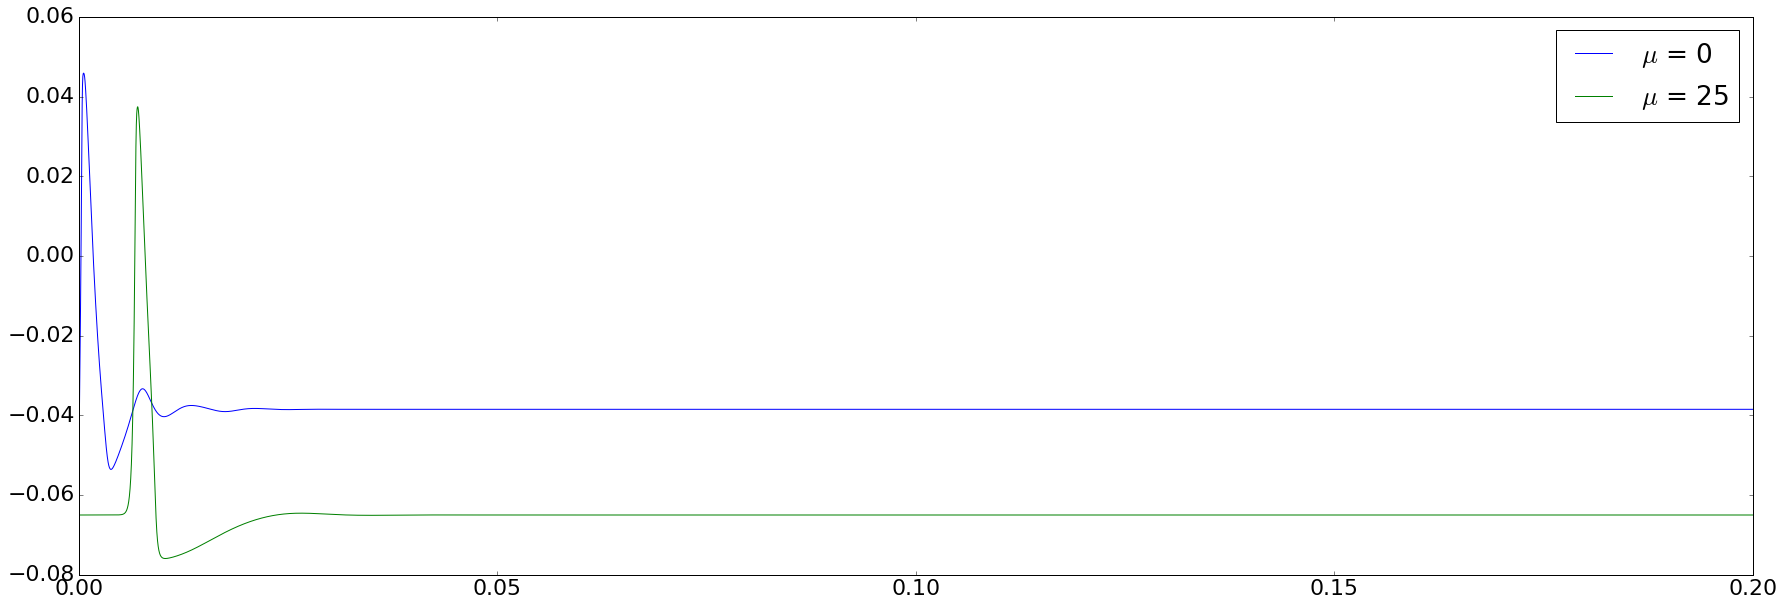

In [85]:
m = MultiCompartmentHodgkinHuxley(N=2001, Ie=[7e-9], mu_inj=[0], L=3e-3)
m.solve(t=0.2, dt=0.0001)
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,mu in enumerate([0,25]):
    ax.plot(m.t, m.v[mu,:], label='$\mu$ = {}'.format(mu))
plt.legend()

In [88]:
for i in range(3):
    m.calculate_propagation_velocity(100,200,test=i)
    print m.prop_velocity

delta x 0.000149925037481
delta t 0.02554
0.00587020506974


IndexError: index 1 is out of bounds for axis 0 with size 1

In [90]:
m.v.shape

(2001, 20000)

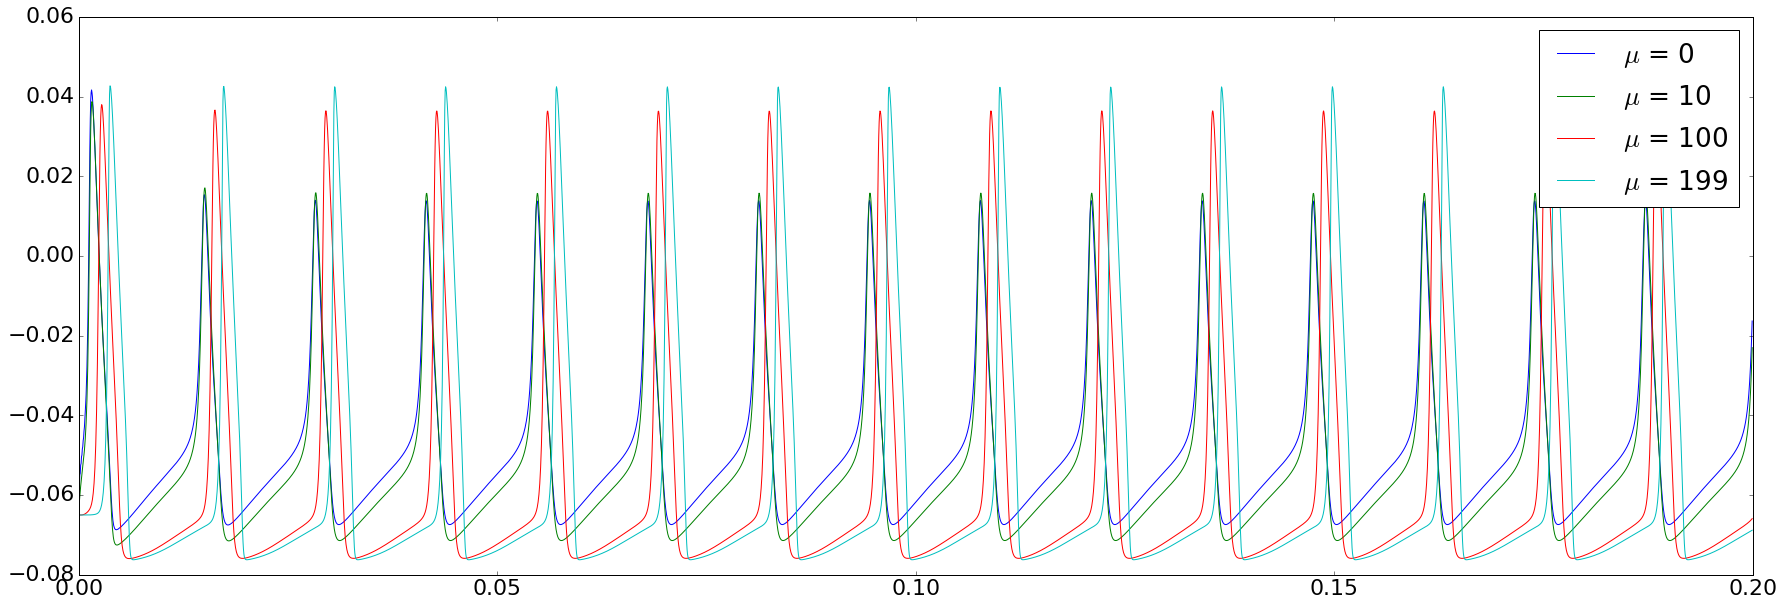

In [15]:
fig,ax = plt.subplots(1,1,figsize=(30,10))
for i,mu in enumerate([0,10,100,199]):
    ax.plot(m.t, m.v[mu,:], label='$\mu$ = {}'.format(mu))
plt.legend()

In [51]:
for i in range(3):
    m.calculate_propagation_velocity(10,25,test=i)
    print m.prop_velocity

0.00666222518321
0.00666222518321
0.00666222518321


In [14]:
m.t[m.t<-900]

array([], dtype=float64)

In [12]:
argrelmax(m.v[0,:])

(array([  26,  197,  367,  537,  707,  877, 1047, 1218, 1388, 1558, 1728,
        1898]),)

In [15]:
argrelmax(m.v[25,:])

(array([  47,  290,  460,  631,  801,  971, 1141, 1312, 1482, 1652, 1822,
        1992]),)

In [17]:
m.v[24,44:49]

array([-0.0649941 , -0.06499409, -0.06499408, -0.06499408, -0.06499408])

In [ ]:
W = [5,10]#np.arange(6.,6.1,0.01)
fig, ax = plt.subplots(len(W),1,figsize=(30,len(W)*10))
for i,ie in enumerate(W):
    m = MultiCompartmentHodgkinHuxley(N=50, mu_inj=0, Ie=ie)
    m.solve(t=300, dt=0.1)
    for mu in [0,20,49]:
        ax[i].plot(m.t, m.v[mu,:], label='$\mu$ = {}'.format(mu))
    ax[i].set_title('Ie = {} nA'.format(ie))
    ax[i].set_ylim(-80,20)
    ax[i].legend()
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('v')

In [ ]:
m.S

In [ ]:
plt.figure(figsize=(30,10))
for mu in [0,1,2,3,4,5]:
    plt.plot(m.t, m.v[mu,:])